In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class cgs: pass
cgs.kg = 1e3 # g
cgs.m = 1e2 # cm
cgs.s = 1 # s
cgs.N = cgs.kg*cgs.m/cgs.s**2 # dyne
cgs.J = cgs.N * cgs.m # erg
cgs.Da = 1.66e-27*cgs.kg # Dalton in g
# Physical constants in cgs
cgs.G = 6.67e-11 * cgs.N * cgs.kg**(-2) * cgs.m**2 # dyne * cm^2 * g^-2
cgs.k_B = 1.38e-23 * cgs.J # erg/K
cgs.au = 1.495e11 * cgs.m # cm
cgs.pc = 3.09e16 * cgs.m # cm
cgs.Msun = 2e33 # g
cgs.Rsun = 6.957e10 # cm
cgs.yr = 3600*24*365 # s
cgs.c = 2.99792458e+10 # cm/s
cgs.ly = 63241.0 * cgs.au # cm
cgs.h = 6.626196e-27 # erg s
cgs.m_p = 1.6726e-24 # g

Get data from the Fortran model

In [3]:
dtype = np.dtype([("xi",float),("th",float),("om",float)])
# File with the structure for n = 1.5 (output of lane_emden.f90)
data15 = np.loadtxt("structure_n15.dat", dtype=dtype)

Text(0, 0.5, '$\\theta$')

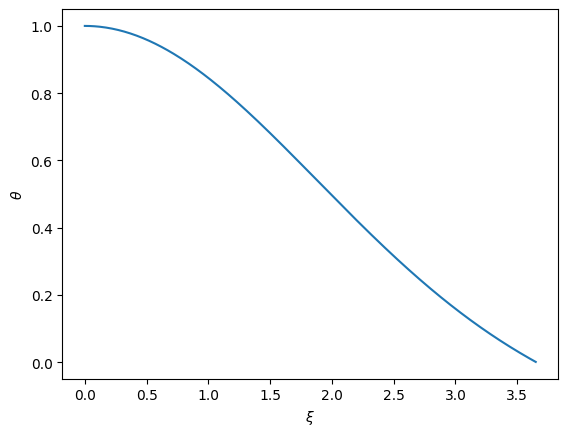

In [4]:
plt.plot(data15["xi"],data15["th"])
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta$")

## Application to the Sun

Estimation of the value of K for the Sun

In [5]:
# Check that the model is run with n = 1.5!
n = 1.5

In [6]:
mean_dens_sun = cgs.Msun/(4/3*np.pi*cgs.Rsun**3)

a = cgs.Rsun/data15["xi"][-1]  # at the last xi, xi = Rsun

# Check Kippenhahn+ 2012 "Stellar Structure and Evolution" Springer - Sect. 19.4
central_density = abs(data15["xi"][-1]**3/(3*data15["om"][-1]))*mean_dens_sun

K_gas = (4*np.pi*a**2*cgs.G)/((n+1)*central_density**(1/n-1))
print(K_gas)

248270663508930.9


In [7]:
# Conversion to cgs
r = a*data15["xi"]
density = central_density * data15["th"]**n
enclosed_mass = 4*np.pi*a**3*central_density*data15["om"]

Text(0, 0.5, '$\\rho$ [$\\bar{\\rho}$]')

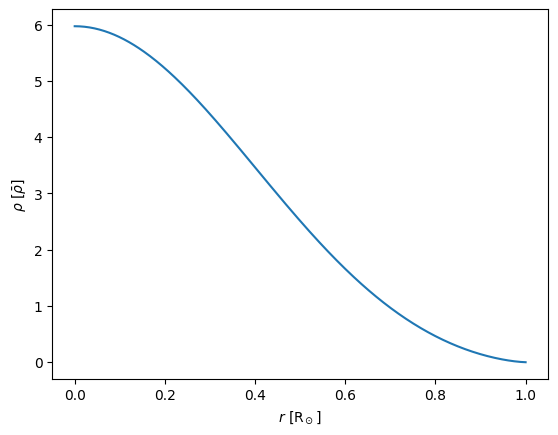

In [8]:
plt.plot(r/cgs.Rsun,density/mean_dens_sun)
plt.xlabel(r"$r$ [R$_\odot$]")
plt.ylabel(r"$\rho$ [$\bar{\rho}$]")

Text(0, 0.5, '$M$ [M$_\\odot$]')

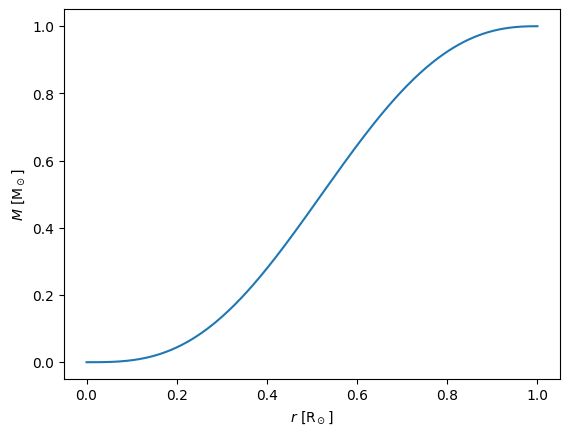

In [9]:
plt.plot(r/cgs.Rsun,enclosed_mass/cgs.Msun)
plt.xlabel(r"$r$ [R$_\odot$]")
plt.ylabel(r"$M$ [M$_\odot$]")

# Chandrasekhar limit

In [10]:
# Check that the model ran with n = 3!
n = 3

Check Choudhuri 2010 "Astrophysics for Physicists" Cambridge - Ch 5

In [11]:
dtype = np.dtype([("xi",float),("th",float),("om",float)])
# File with the structure for n = 3 (output of lane_emden.f90)
data3 = np.loadtxt("structure_n3.dat", dtype=dtype)

In [12]:
k0 = np.abs(data3["om"][-1])

In [13]:
mu_e = 2
MCh = np.sqrt(6)/(32*np.pi) * (cgs.h*cgs.c/cgs.G)**(3/2) * (2/mu_e)**2 * np.abs(k0)/(cgs.m_p**2)
print(MCh/cgs.Msun)

1.428473563421748


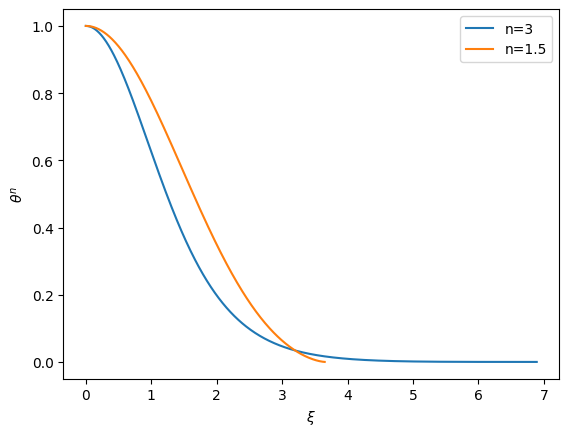

In [14]:
plt.plot(data3["xi"],data3["th"]**3,label="n=3")
plt.plot(data15["xi"],data15["th"]**1.5,label="n=1.5")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta^n$")
plt.legend()

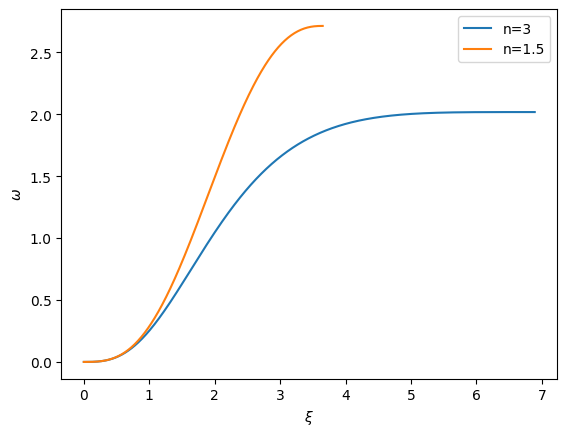

In [15]:
plt.plot(data3["xi"],data3["om"],label="n=3")
plt.plot(data15["xi"],data15["om"],label="n=1.5")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\omega$")
plt.legend()